In [1]:
# DoBasicStats

In [2]:
from common_immunogit import *

2025-05-06 18:23:33,211 - INFO - Root path: /Users/guillaume.souede/PycharmProjects/immunogit
2025-05-06 18:23:33,212 - INFO - Directory structure set up successfully.


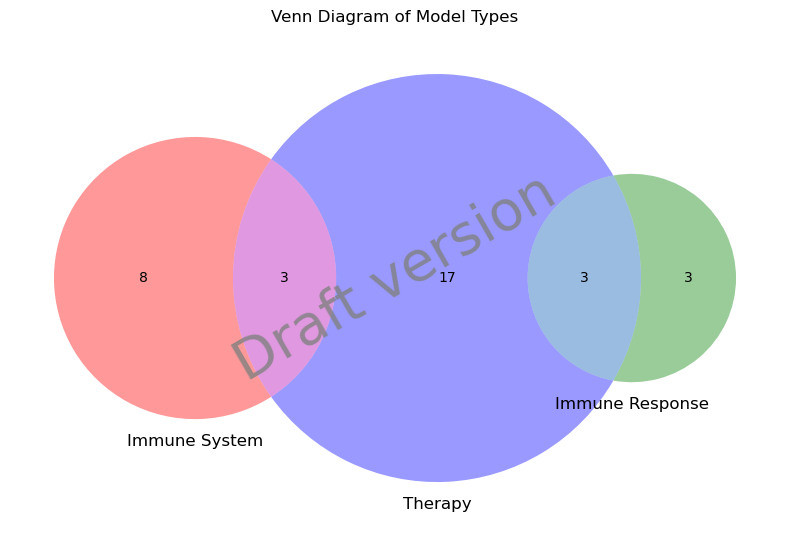

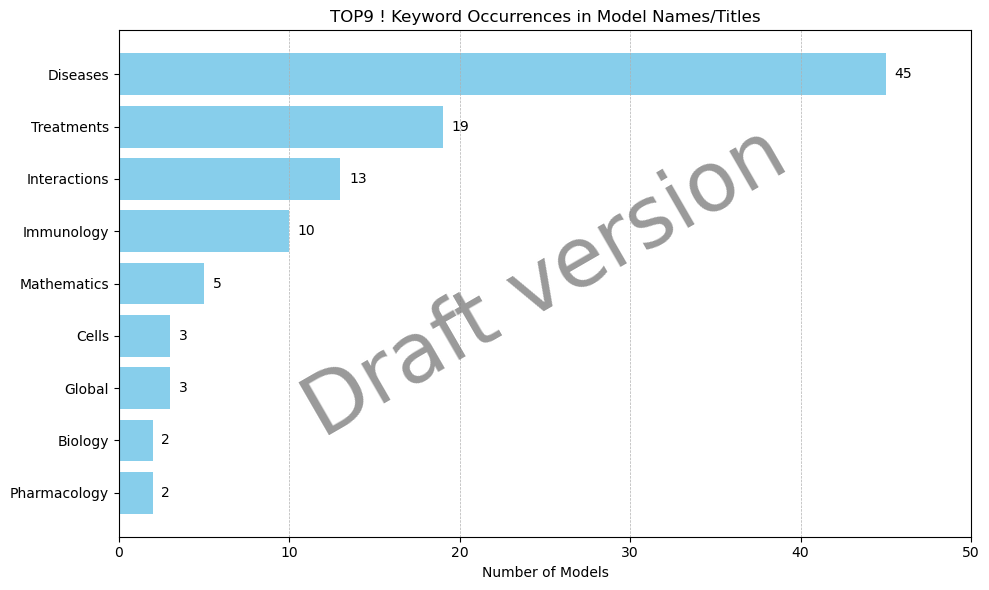

        Keyword  Count
3      Diseases     45
1    Treatments     19
2  Interactions     13
4    Immunology     10
6   Mathematics      5
0         Cells      3
8        Global      3
5       Biology      2
7  Pharmacology      2


In [3]:
import json
from matplotlib import pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
from collections import defaultdict

metadata_file_path = root_path / "metadata" / "model_metadata_tags.json"
keywords_file_path = root_path / "tmp" / "keywords.json"

title_keywords = ["immune system", "immune response", "therapy"]

with open(metadata_file_path, "r", encoding="utf-8") as f:
    model_metadata = json.load(f)

with open(keywords_file_path, "r", encoding="utf-8") as keywords_file:
    keywords_dict = json.load(keywords_file)

model_categories = defaultdict(set)

for model_id, entry in model_metadata.items():
    name = entry.get("name", "").lower()
    title = entry.get("publication", {}).get("title", "").lower()
    matched = False
    for keyword in title_keywords:
        if keyword in name or keyword in title:
            model_categories[keyword].add(model_id)
            matched = True
    if not matched:
        model_categories["OTHER"].add(model_id)

immune_system_set = model_categories["immune system"]
immune_response_set = model_categories["immune response"]
therapy_set = model_categories["therapy"]

plt.figure(figsize=(8, 6))
venn3([immune_system_set, immune_response_set, therapy_set],
      set_labels=("Immune System", "Immune Response", "Therapy"))
plt.title("Venn Diagram of Model Types")
plt.text(0.5, 0.5, 'Draft version', transform=plt.gca().transAxes,
         fontsize=40, color='gray', alpha=0.8,
         ha='center', va='center', rotation=30)
plt.tight_layout()
plt.show()

keyword_counts = []
for keyword, variants in keywords_dict.items():
    count = 0
    for model_id, entry in model_metadata.items():
        text = (entry.get("name", "") + " " + entry.get("publication", {}).get("title", "")).lower()
        if any(variant.lower() in text for variant in variants):
            count += 1
    keyword_counts.append((keyword, count))

import matplotlib.pyplot as plt
import pandas as pd

df_keywords = pd.DataFrame(keyword_counts, columns=["Keyword", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.barh(df_keywords["Keyword"], df_keywords["Count"], color="skyblue")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, str(int(width)), va='center', ha='left', fontsize=10)

plt.xlabel("Number of Models")
plt.title("TOP9 ! Keyword Occurrences in Model Names/Titles") # TOP10 not working
plt.grid(axis="x", linestyle="--", linewidth=0.5)
plt.xticks(range(0, df_keywords["Count"].max() + 10, 10))
plt.text(0.5, 0.5, 'Draft version', transform=plt.gca().transAxes,
         fontsize=60, color='gray', alpha=0.8,
         ha='center', va='center', rotation=30)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print(df_keywords)



In [4]:
import requests

def encode_query_custom(query):
    return (
        query
        .replace(":", "%3A")
        .replace('"', "%22")
        .replace(" ", "+")
    )

def build_query(parts):
    return " AND ".join(parts)

def get_num_results(query, domain="biomodels"):
    query_for_url = encode_query_custom(query)
    url = f"https://www.ebi.ac.uk/biomodels/search?query={query_for_url}&domain={domain}"
    response = requests.get(url)
    if response.ok:
        return response.text, url
        
filters_to_add = [
    '*:*',
    'TAXONOMY:9606',
    'curationstatus:"Manually curated"',
    'modelformat:"SBML"',
    'submitter_keywords:"Immuno-oncology"'
]

steps = []
current_filters = []

for f in filters_to_add:
    current_filters.append(f)
    steps.append(list(current_filters))

hits = []

for i, step in enumerate(steps, 1):
    query = build_query(step)
    _, url = get_num_results(query)

print(hits)


[]


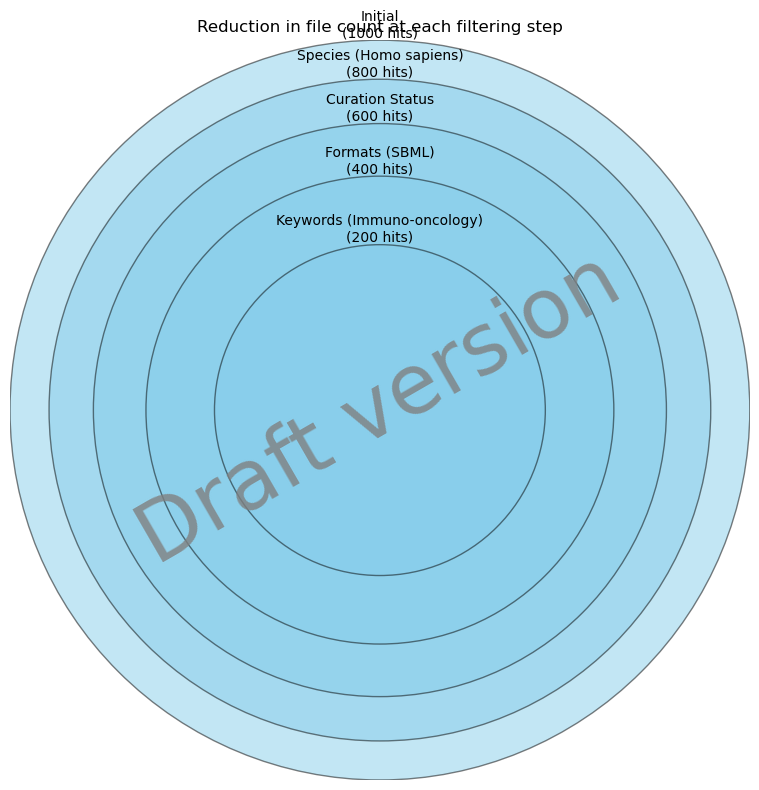

In [5]:
import matplotlib.pyplot as plt
import numpy as np

steps = [
    "Initial", 
    "Species (Homo sapiens)", 
    "Curation Status", 
    "Formats (SBML)", 
    "Keywords (Immuno-oncology)"
]
hits = [1000, 800, 600, 400, 200]  # needs real data ! from first file !!

plt.figure(figsize=(8, 8))

center = [0, 0]

for i, hit in enumerate(hits):
    radius = np.sqrt(hit / max(hits))
    circle = plt.Circle(center, radius, facecolor="skyblue", alpha=0.5, label=steps[i], edgecolor="black", linewidth=1)
    plt.gca().add_artist(circle)

for i, hit in enumerate(hits):
    radius = np.sqrt(hit / max(hits))
    plt.text(center[0], center[1] + radius, f"{steps[i]}\n({hit} hits)", 
             ha='center', va='bottom', fontsize=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Reduction in file count at each filtering step")
plt.text(0.5, 0.5, 'Draft version', transform=plt.gca().transAxes,
         fontsize=60, color='gray', alpha=0.8,
         ha='center', va='center', rotation=30)

plt.axis('off')  # this removes the axes x and y !!
plt.tight_layout()
plt.show()


/var/folders/qw/k16w8vc97vxcv4s051kvnzxc0000gn/T/ipykernel_4672/456744952.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


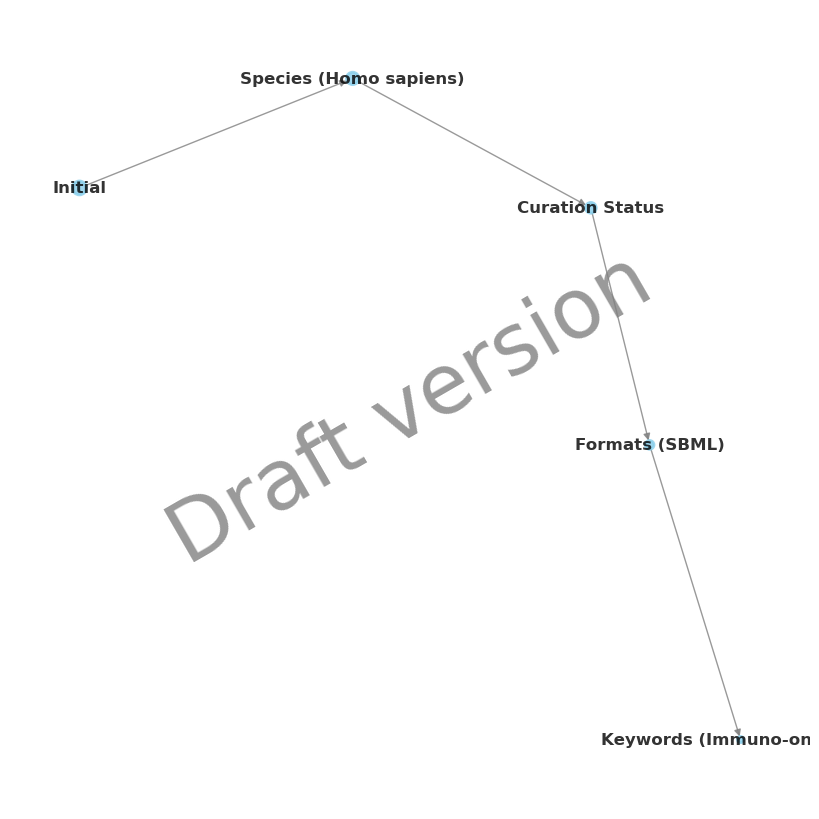

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

steps = [
    "Initial", 
    "Species (Homo sapiens)", 
    "Curation Status", 
    "Formats (SBML)", 
    "Keywords (Immuno-oncology)"
]
hits = [1000, 800, 600, 400, 200]

G = nx.DiGraph()

for i, step in enumerate(steps):
    G.add_node(step, size=hits[i])

for i in range(len(steps) - 1):
    G.add_edge(steps[i], steps[i+1])

pos = nx.spring_layout(G)

node_sizes = [G.nodes[node]['size']*0.1 for node in G.nodes]

plt.figure(figsize=(8, 8))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color='skyblue', edge_color='gray', 
        font_size=12, font_weight='bold', alpha=0.8, linewidths=2)

plt.text(0.5, 0.5, 'Draft version', transform=plt.gca().transAxes,
         fontsize=60, color='gray', alpha=0.8,
         ha='center', va='center', rotation=30)

plt.axis('off')

plt.tight_layout()
plt.show()
